<a href="https://colab.research.google.com/github/stuthikathula/pharmacy-stock1/blob/main/project4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
# read an excel file and convert

df = pd.DataFrame(pd.read_excel("dataset.xlsx"))

# show the dataframe
df


,MEDICINE-NAME,CURRENT STOCK,DEMAND,LEAD TIME
0,Abacavir,46,23,1
1,Abilify,48,44,2
2,Accutane,55,24,6
3,Acetaminophen,40,46,3
4,Acetylcysteine,45,21,10
...,...,...,...,...
666,Zolpidem,38,19,3
667,Zonisamide,49,36,1
668,Zoledronic Acid,33,23,10
669,Zotepine,36,36,10


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# New Section

In [ ]:
df.head()

,MEDICINE-NAME,CURRENT STOCK,DEMAND,LEAD TIME
0,Abacavir,59,23,8
1,Abilify,68,34,1
2,Accutane,176,35,2
3,Acetaminophen,138,31,5
4,Acetylcysteine,177,33,10


In [ ]:
df.tail()

,MEDICINE-NAME,CURRENT STOCK,DEMAND,LEAD TIME
666,Zolpidem,103,31,7
667,Zonisamide,167,49,2
668,Zoledronic Acid,128,30,7
669,Zotepine,85,47,7
670,Zuclopenthixol,93,13,1


In [ ]:
df.shape

(671, 4)

In [ ]:
df.columns

Index(['MEDICINE-NAME', 'CURRENT STOCK', 'DEMAND', 'LEAD TIME'], dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 671 entries, 0 to 670
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MEDICINE-NAME  671 non-null    object
 1   CURRENT STOCK  671 non-null    int64 
 2   DEMAND         671 non-null    int64 
 3   LEAD TIME      671 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 21.1+ KB


In [ ]:
df.describe()

,CURRENT STOCK,DEMAND,LEAD TIME
count,671.000000,671.000000,671.000000
mean,122.685544,30.277198,5.523100
std,43.143541,11.999654,2.868093
min,50.000000,10.000000,1.000000
25%,84.000000,20.000000,3.000000
50%,123.000000,30.000000,5.000000
75%,159.000000,41.000000,8.000000
max,200.000000,50.000000,10.000000


In [ ]:
df.isnull().sum()

MEDICINE-NAME    0
CURRENT STOCK    0
DEMAND           0
LEAD TIME        0
dtype: int64

In [ ]:
current_stock = df['CURRENT STOCK']
demand_stock = df['DEMAND']
medicine_names = df['MEDICINE-NAME']
lead_time = df['LEAD TIME']

In [ ]:
df['Prediction'] = current_stock-demand_stock*lead_time

# Label whether it's understock or overstock
df['Stock Status'] = df['Prediction'].apply(lambda x: 'Understock' if x < 0 else 'Overstock')

print(df)


       MEDICINE-NAME  CURRENT STOCK  DEMAND  LEAD TIME  Prediction  \
0           Abacavir             59      23          8        -125   
1            Abilify             68      34          1          34   
2           Accutane            176      35          2         106   
3      Acetaminophen            138      31          5         -17   
4     Acetylcysteine            177      33         10        -153   
..               ...            ...     ...        ...         ...   
666         Zolpidem            103      31          7        -114   
667       Zonisamide            167      49          2          69   
668  Zoledronic Acid            128      30          7         -82   
669         Zotepine             85      47          7        -244   
670   Zuclopenthixol             93      13          1          80   

    Stock Status  
0     Understock  
1      Overstock  
2      Overstock  
3     Understock  
4     Understock  
..           ...  
666   Understock  
667    

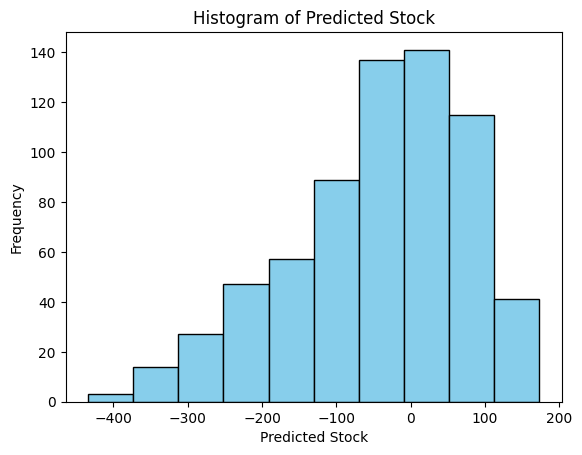

In [ ]:
import matplotlib.pyplot as plt

# Histogram
plt.hist(df['Prediction'], bins=10, color='skyblue', edgecolor='black')
plt.xlabel('Predicted Stock')
plt.ylabel('Frequency')
plt.title('Histogram of Predicted Stock')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
# Define features (X) and target variable (y)
X = df[['CURRENT STOCK','DEMAND','LEAD TIME']].values
y = np.where(df['Prediction'] < 0, 0, 1)  # Assign 0 for understock and 1 for overstock
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.linear_model import LogisticRegression
# Initialize logistic regression model
logistic_model = LogisticRegression()
# Train the model
logistic_model.fit(X_train, y_train)
# Make predictions
y_pred = logistic_model.predict(X_test)
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print('\nClassification Report:')
print(classification_report(y_test, y_pred))
print('\nConfusion Matrix:')
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.92

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.93      0.93        76
           1       0.91      0.90      0.91        59

    accuracy                           0.92       135
   macro avg       0.92      0.92      0.92       135
weighted avg       0.92      0.92      0.92       135


Confusion Matrix:
[[71  5]
 [ 6 53]]
